<a href="https://colab.research.google.com/github/gourav10/autoencoder_embedding/blob/main/ablation_pca_vs_encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Dependencies

In [1]:
from six.moves import urllib
opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]
urllib.request.install_opener(opener)

In [3]:
import pandas as pd
import random
from tqdm import tqdm
import torch
from torchvision import datasets
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from torchvision import transforms
import random
from torch.utils.data import DataLoader,random_split
from google.colab import drive
import os

In [4]:
#For standardising the dat
from sklearn.preprocessing import StandardScaler

#PCA
from sklearn.decomposition import PCA

# Clustering with PCA embedding demension 4

## Download Dta and Generate Dataloader

In [5]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [6]:
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

In [7]:
!export PYTHONPATH=$PYTHONPATH:"/content/gdrive/MyDrive/CS7180"

In [8]:
%cd /content/gdrive/MyDrive/CS7180

/content/gdrive/MyDrive/CS7180


In [9]:
import os
DATA_DIR = '/content/gdrive/MyDrive/CS7180/data'
os.makedirs(DATA_DIR,exist_ok=True)

In [15]:
train_df = pd.read_csv(os.path.join(DATA_DIR,'mnist_train.csv'))
test_df = pd.read_csv(os.path.join(DATA_DIR,'mnist_test.csv'))

In [16]:
train_df.head()

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
train_df.rename(columns={'5':'label'},inplace=True)
test_df.rename(columns={'7':'label'},inplace=True)

In [18]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59999 entries, 0 to 59998
Columns: 785 entries, label to 0.617
dtypes: int64(785)
memory usage: 359.3 MB


## Standardize Data

In [19]:
Y = train_df.loc[:,'label'].values
X = train_df.loc[:,'0':].values

standardized_data = StandardScaler().fit_transform(X)
print(standardized_data.shape)

(59999, 784)


## Perform PCA to reduce 784 dims to 4 dims

In [20]:
## Importing and Apply PCA

pca = PCA(n_components=4) # project from 784 to 2 dimensions
principalComponents = pca.fit_transform(X)
principal_df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4'])
principal_df.shape

(59999, 4)

In [21]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.0970481  0.07095988 0.06169185 0.05389354]


## Cluster and get Silhouette Score

In [22]:
n_digits = len(np.unique(Y))
print(n_digits)

10


In [24]:
from sklearn.cluster import MiniBatchKMeans

In [28]:
kmeans = MiniBatchKMeans(n_clusters = n_digits)

kmeans.fit(principal_df)

MiniBatchKMeans(n_clusters=10)

In [29]:
from sklearn import metrics
metrics.silhouette_score(principal_df, kmeans.labels_)

0.237059794497708

# Clustering with PCA embedding demension 2

In [30]:
train_df = pd.read_csv(os.path.join(DATA_DIR,'mnist_train.csv'))
test_df = pd.read_csv(os.path.join(DATA_DIR,'mnist_test.csv'))

In [31]:
train_df.rename(columns={'5':'label'},inplace=True)
test_df.rename(columns={'7':'label'},inplace=True)

In [32]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59999 entries, 0 to 59998
Columns: 785 entries, label to 0.617
dtypes: int64(785)
memory usage: 359.3 MB


In [33]:
Y = train_df.loc[:,'label'].values
X = train_df.loc[:,'0':].values

standardized_data = StandardScaler().fit_transform(X)
print(standardized_data.shape)

(59999, 784)


In [35]:
pca = PCA(n_components=2) # project from 784 to 5 dimensions
principalComponents = pca.fit_transform(X)
principal_df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])#, 'principal component 3', 'principal component 4'])
principal_df.shape

(59999, 2)

Text(0, 0.5, 'Principal Component 2')

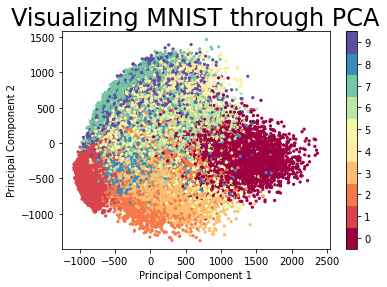

In [37]:
plt.scatter(principalComponents[:, 0], principalComponents[:, 1], s= 5, c=Y, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Visualizing MNIST through PCA', fontsize=24);
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

In [38]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.0970481  0.07095988]


In [39]:
n_digits = len(np.unique(Y))
print(n_digits)

10


In [40]:
n_digits = len(np.unique(Y))
print(n_digits)

10


In [41]:
from sklearn.cluster import MiniBatchKMeans

In [42]:
kmeans = MiniBatchKMeans(n_clusters = n_digits)

kmeans.fit(principal_df)

MiniBatchKMeans(n_clusters=10)

In [43]:
from sklearn import metrics
metrics.silhouette_score(principal_df, kmeans.labels_)

0.3448693593389579